<AxesSubplot:>

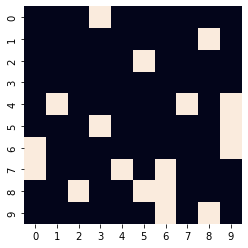

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

#red de Eros-Reynolds
# 1. Definir la red
# 2. Definir las condiciones iniciales
# 3. Denifinir los nodos

N = 10 #numero de nodos
k = 2 # conexiones promedio por nodo (max i N-1)
p = k/N #probabilidad de conexion

np.zeros((N,N)) #matriz de ceros
mat_C= bernoulli.rvs(p, size=(N,N)) #matriz de Bernoulli
np.fill_diagonal(mat_C, 0)#llenar la diagonal de ceros
sns.heatmap(mat_C, cbar=False, annot=False, square=True)#graficar la matriz




In [54]:
edge_list = [(u,v) for u,v in zip(*np.where(mat_C))]
edge_list

[(0, 3),
 (1, 8),
 (2, 5),
 (4, 1),
 (4, 7),
 (4, 9),
 (5, 3),
 (5, 9),
 (6, 0),
 (6, 9),
 (7, 0),
 (7, 4),
 (7, 6),
 (8, 2),
 (8, 5),
 (8, 6),
 (9, 6),
 (9, 8)]

In [55]:
# Adjacency list
adj_list = {ni: np.where(mat_C[ni])[0] for ni in range(N)}
adj_list

{0: array([3], dtype=int64),
 1: array([8], dtype=int64),
 2: array([5], dtype=int64),
 3: array([], dtype=int64),
 4: array([1, 7, 9], dtype=int64),
 5: array([3, 9], dtype=int64),
 6: array([0, 9], dtype=int64),
 7: array([0, 4, 6], dtype=int64),
 8: array([2, 5, 6], dtype=int64),
 9: array([6, 8], dtype=int64)}

In [56]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

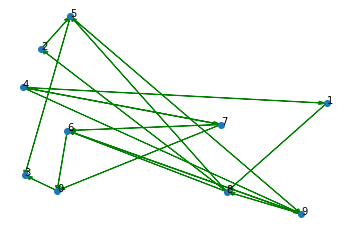

In [57]:
xy = np.random.random(size=(N, 2))

plt.plot(xy[:,0], xy[:,1], 'o')

[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)]
[draw_edge(xy[uv[0]], xy[uv[1]], hw=0.015) for uv in edge_list];
plt.axis('off');

(-1.100439428553354,
 1.100328812682313,
 -1.0466816980205833,
 1.0466106782596232)

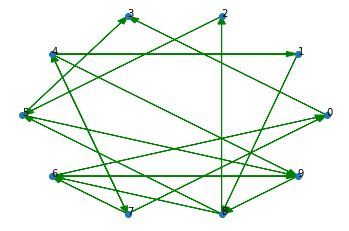

In [58]:
angle = np.linspace(0, 2*np.pi, 10, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)
plt.plot(x, y, 'o')
[plt.text(x[i], y[i], str(i)) for i in range(N)];
[draw_edge((x[uv[0]], y[uv[0]]), (x[uv[1]], y[uv[1]]), hw=0.05) for uv in edge_list];
plt.axis('off')

In [59]:
N=11
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C

array([[ 1, -1,  2, -2],
       [ 2,  0,  3, -1],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8, 11,  7],
       [11,  9, 12,  8]])

In [60]:
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

In [61]:
edge_list = []
for ni in range(N): 
    for v in C[ni]:
        edge_list += [(ni, v)]
edge_list

[(0, 1),
 (0, 10),
 (0, 2),
 (0, 9),
 (1, 2),
 (1, 0),
 (1, 3),
 (1, 10),
 (2, 3),
 (2, 1),
 (2, 4),
 (2, 0),
 (3, 4),
 (3, 2),
 (3, 5),
 (3, 1),
 (4, 5),
 (4, 3),
 (4, 6),
 (4, 2),
 (5, 6),
 (5, 4),
 (5, 7),
 (5, 3),
 (6, 7),
 (6, 5),
 (6, 8),
 (6, 4),
 (7, 8),
 (7, 6),
 (7, 9),
 (7, 5),
 (8, 9),
 (8, 7),
 (8, 10),
 (8, 6),
 (9, 10),
 (9, 8),
 (9, 0),
 (9, 7),
 (10, 0),
 (10, 9),
 (10, 1),
 (10, 8)]

In [62]:
omega = 0.1  # rewire 10% of the connections
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

In [63]:
N=11
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

R = C.copy()
omega = 0.1  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 4,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

<AxesSubplot:>

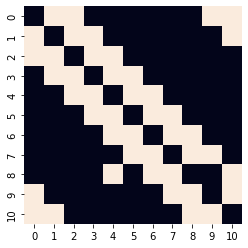

In [64]:
adj_matrix = np.zeros((N, N), dtype='int')
for ni, v in enumerate(C):
    for vi in v:
        adj_matrix[ni][vi] = 1
sns.heatmap(adj_matrix, cbar=False, annot=False, square=True)


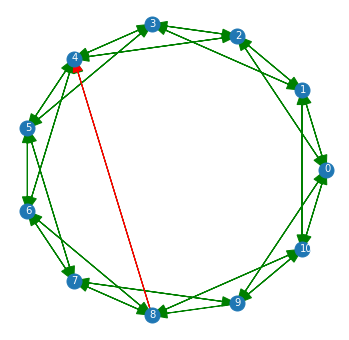

In [65]:
def draw_edge(a, b, ni, nj, hw=0, color='green'): #ni y nj son los nodos

    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False) # N puntos equiespaciados

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N): # i es el nodo 
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')#c es el color de la letra, x e y son las coordenadas
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) # a y b son los nodos y hw es el grosor de la flecha x y y son las coordenadas
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]# adj_list[a] son los vecinos de a
    
    if rewired_arcs is not None: # si hay arcos rewireados
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

adj_list = {node: neighbors for node, neighbors in enumerate(C)} #adj_list es una lista de adyacencia de los nodos y sus vecinos 

rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}#rewired_arcs es una lista de adyacencia de los nodos y sus vecinos rewireados

plot_circular_layout(adj_list, hw=0.065, rewired_arcs=rewired_arcs)

Check: https://arxiv.org/pdf/cond-mat/0603396.pdf

In [66]:
x = bernoulli.rvs(p=0.5, size=N)# x es una lista de 0 y 1 de tamaño N, estado de las neuronas
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1 # S es una matriz de 0 y 1 de tamaño Nxk, estado de los vecinos de las neuronas
x, S

(array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]),
 array([[ 1, -1,  1, -1],
        [-1,  1, -1,  1],
        [-1,  1, -1, -1],
        [ 1, -1, -1, -1],
        [ 1, -1, -1, -1],
        [-1, -1, -1,  1],
        [ 1, -1, -1,  1],
        [-1, -1,  1, -1],
        [-1,  1, -1, -1],
        [-1, -1,  1, -1],
        [ 1,  1, -1, -1]]))

In [67]:
# Nodo 0
C[0], x[C[0]], S[0], x[C[0]]*S[0], (x[C[0]]*S[0]).sum()

(array([ 1, 10,  2,  9]),
 array([0, 1, 1, 0]),
 array([ 1, -1,  1, -1]),
 array([ 0, -1,  1,  0]),
 0)

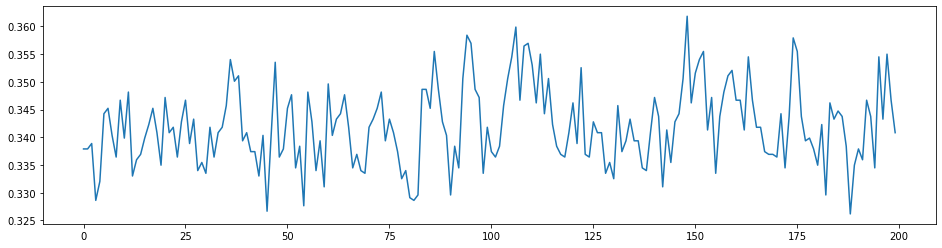

In [71]:
N=2048
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

# Rewiring
omega = 1.0  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)


x = bernoulli.rvs(p=0.5, size=N)  # neural states
activity = [x.mean()]  # activity of the network
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts

time = 1000

for t in range(time):
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni]=int((x_t[C[ni]]*S[ni]).sum() > 0)
    #print(x)
    activity += [x.mean()]
plt.figure(figsize=(16, 4))
plt.plot(activity[-200:])